In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
ecar_df = pd.read_csv("./Database/Cheapestelectriccars-EVDatabase.csv")
ecar_df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [3]:
print(ecar_df.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [4]:
#Clean the blank spaces
ecar_df = ecar_df.fillna('0')
#Create a new column
ecar_df.insert(loc=0, column="Manufacturer", value=ecar_df.Name.str.split(' ', n=1, expand=True)[0])

In [5]:
ecar_df.dtypes

Manufacturer       object
Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object

In [6]:
#Subtitle column
Subtitle=[]
for item in ecar_df['Subtitle']:
    Subtitle.append(float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ','')))
ecar_df['Subtitle']=Subtitle

In [7]:
#Acceleration column
Acceleration=[]
for item in ecar_df['Acceleration']:
    Acceleration.append(float(item.replace(' sec','')))
ecar_df['Acceleration']=Acceleration

In [8]:
#TopSpeed column
TopSpeed=[]
for item in ecar_df['TopSpeed']:
    TopSpeed.append(int(item.replace(' km/h','')))
ecar_df['TopSpeed']=TopSpeed

In [9]:
#Range column
Range=[]
for item in ecar_df['Range']:
    Range.append(int(item.replace(' km','')))
ecar_df['Range']=Range

In [10]:
#Efficiency column
Efficiency=[]
for item in ecar_df['Efficiency']:
    Efficiency.append(int(item.replace(' Wh/km','')))
ecar_df['Efficiency']=Efficiency

In [11]:
#FastChargeSpeed column
FastChargeSpeed=[]
for item in ecar_df['FastChargeSpeed']:
    FastChargeSpeed.append(int(item.replace(' km/h','').replace('-','0')))
ecar_df['FastChargeSpeed']=FastChargeSpeed

In [12]:
#Clean dataframe
#Remove currency signs
PriceinUK=[]
for item in ecar_df['PriceinUK']:
    PriceinUK.append(int(item.replace('£','').replace(',','')))
ecar_df['PriceinUK']=PriceinUK

PriceinGermany=[]
for item in ecar_df['PriceinGermany']:
    PriceinGermany.append(int(item.replace('€','').replace(',','')))
ecar_df['PriceinGermany']=PriceinGermany

In [13]:
ecar_df = ecar_df.rename(columns={'Name':'Model',
                                  'Subtitle':'Subtitle(kWh)',
                                  'Acceleration':'Acceleration(sec)',
                                  'TopSpeed':'TopSpeed (km/h)',
                                  'Range':'Range(km)',
                                  'Efficiency':'Efficiency(Wh/km)',
                                  'FastChargeSpeed':'FastChargeSpeed(km/h)',
                                  'PriceinGermany':'Pricein€',
                                  'PriceinUK':'Pricein£'
                                 })
ecar_df.head()

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€,Pricein£
0,Opel,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


# Rating based in the information

In [14]:
d = 5
# Battery Capacity
c = 4
# TopSpeed
a = 3 
# Efficiency
e = 2
# Range
b = 1
# FastChargeSpeed

In [15]:
rating = (ecar_df["Efficiency(Wh/km)"]*a) + (ecar_df["FastChargeSpeed(km/h)"]*b) + (ecar_df["TopSpeed (km/h)"]*c) + (ecar_df["Subtitle(kWh)"]*d) +(ecar_df["Range(km)"]*e)
ecar_df_r = ecar_df

In [16]:
ecar_df_r["Rating"] = rating

In [17]:
rat = ecar_df_r.sort_values(by='Rating', ascending=False)
rat.head(10)

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€,Pricein£,Rating
19,Tesla,Tesla Roadster,200.0,2.1,410,970,206,920,All Wheel Drive,4,215000,189000,6118.0
59,Tesla,Tesla Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,75000,68000,4851.0
90,Lucid,Lucid Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,140000,125000,4831.0
91,Lucid,Lucid Air Touring,85.0,3.4,250,530,160,1390,All Wheel Drive,5,95000,90000,4355.0
92,Lucid,Lucid Air Pure,85.0,4.2,200,540,157,1410,Rear Wheel Drive,5,80000,70000,4186.0
124,Tesla,Tesla Model S Plaid,90.0,2.1,322,535,168,800,All Wheel Drive,5,126990,118980,4112.0
149,Mercedes,Mercedes EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,106374,95000,4003.0
150,Mercedes,Mercedes EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,135529,115000,3930.0
123,Tesla,Tesla Model S Long Range,90.0,3.2,250,555,162,830,All Wheel Drive,5,86990,83980,3876.0
47,Porsche,Porsche Taycan 4S Plus,83.7,4.0,250,435,192,910,All Wheel Drive,4,113008,88193,3774.5


In [18]:
dollar = ecar_df_r["Pricein€"]*1.09
ecar_df_r["Pricein$"] = dollar

In [19]:
ecar_df_r

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€,Pricein£,Rating,Pricein$
0,Opel,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,2289.0,46859.10
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,1577.0,0.00
2,Nissan,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,1918.0,32689.10
3,Audi,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,3275.5,0.00
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,3743.5,203106.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,MG,MG Marvel R,65.0,7.9,200,340,191,390,Rear Wheel Drive,5,40000,0,2768.0,43600.00
176,Tesla,Tesla Model 3 Long Range Dual Motor,76.0,4.4,233,490,155,820,All Wheel Drive,5,53560,0,3577.0,58380.40
177,MG,MG MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,0,26495,2549.0,0.00
178,Audi,Audi Q4 e-tron 45 quattro,76.6,6.9,180,385,199,470,All Wheel Drive,5,50900,0,2940.0,55481.00


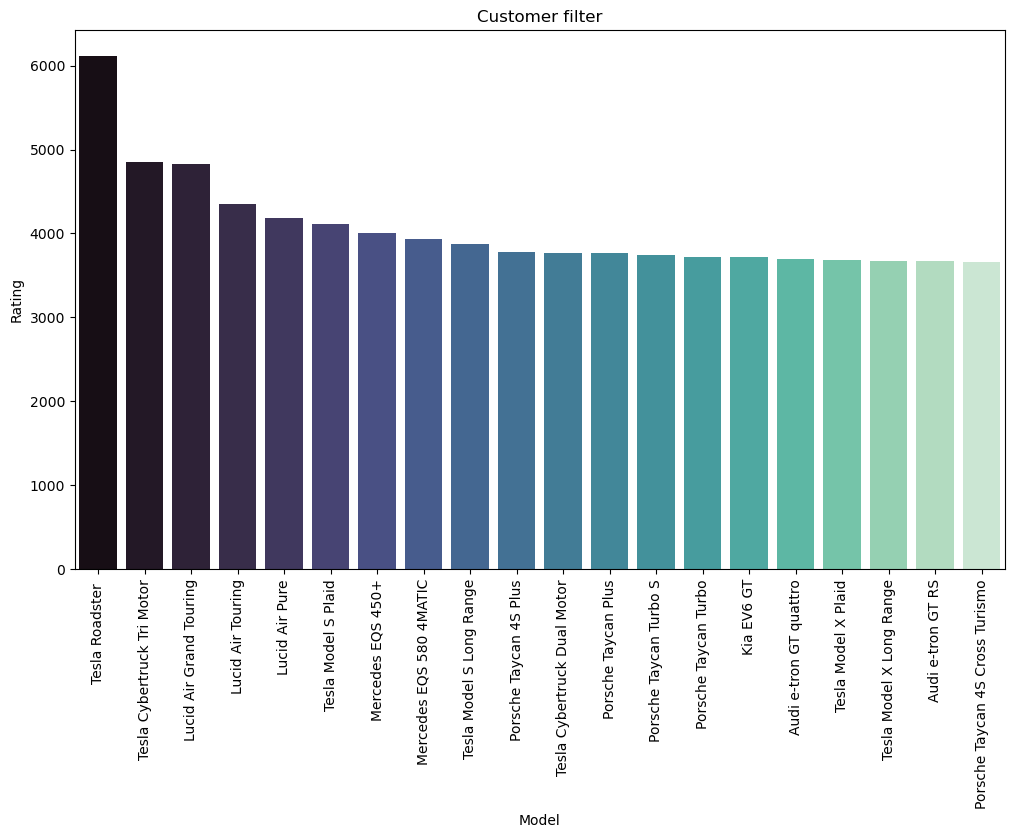

In [20]:
plt.figure(figsize = (12,7))
data_rat = ecar_df_r[["Model","Rating","Pricein$"]].sort_values(by = ["Rating"],ascending = False)
data_rat_20 = data_rat[:20]
sns.barplot(x = data_rat_20["Model"],y = data_rat_20["Rating"],palette = "mako" )

plt.xticks(rotation = "vertical")
plt.xlabel("Model")
plt.title("Customer filter")
plt.savefig("rating.png")

Text(0.5, 1.0, 'Price Top 20')

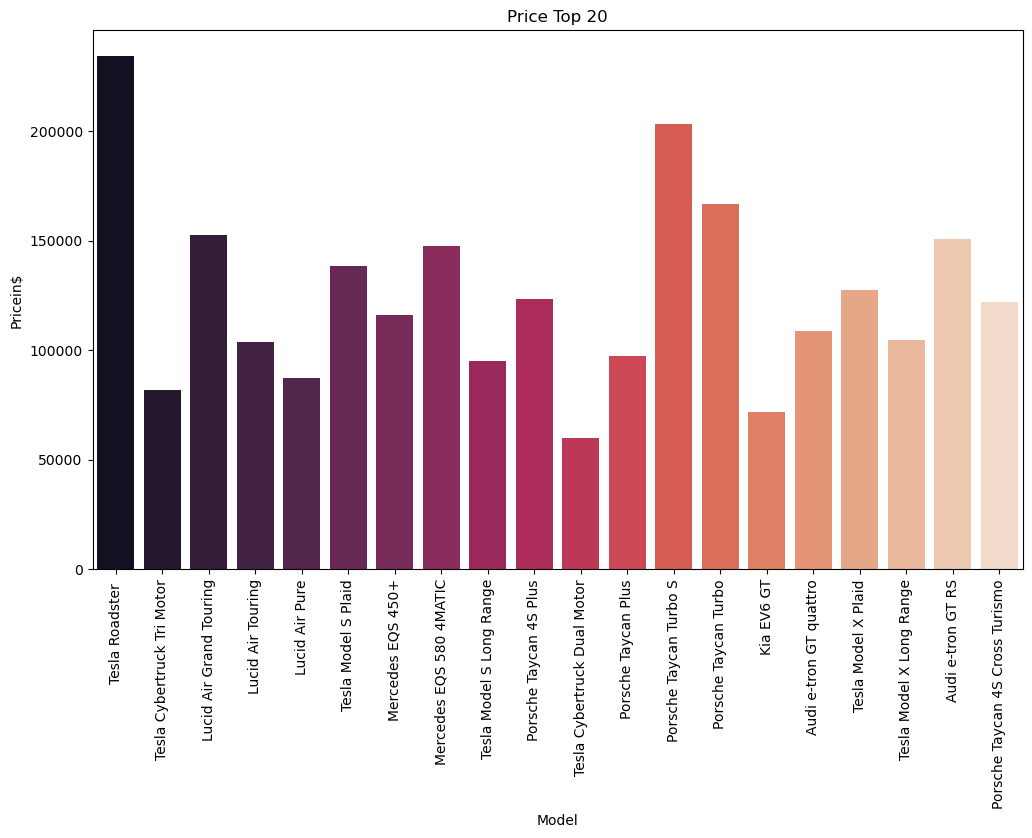

In [21]:
plt.figure(figsize = (12,7))
sns.barplot(x = data_rat_20["Model"],y = data_rat_20["Pricein$"],palette = "rocket" )
plt.xticks(rotation = "vertical")
plt.title("Price Top 20")

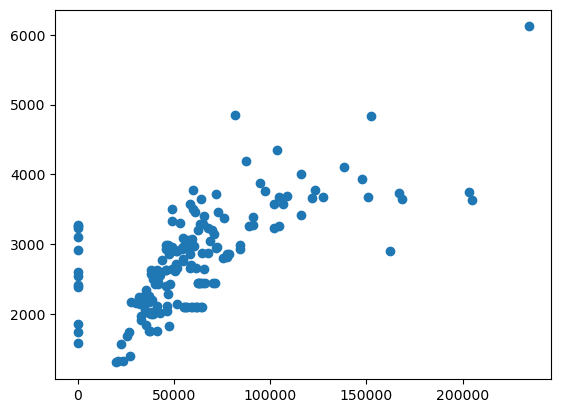

In [22]:
price = ecar_df_r.iloc[:,13]
rating = ecar_df_r.iloc[:,12]
plt.scatter(price,rating)

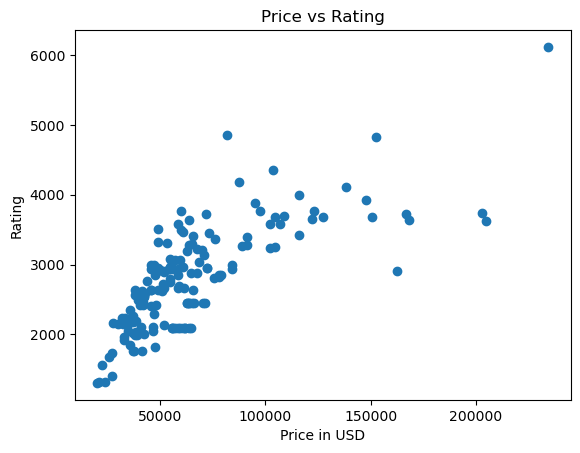

In [23]:
filtro = ecar_df_r['Pricein$']!= 0
new_filter = ecar_df_r[filtro]
price = new_filter.iloc[:,13]
rating = new_filter.iloc[:,12]
plt.scatter(price,rating)
plt.title("Price vs Rating")
plt.xlabel("Price in USD")
plt.ylabel("Rating")
plt.style.use("fivethirtyeight")